# Curso Completo de Machine Learning con Python. Nivel intermedio

La mayoría de proyectos de Data Science y generación de modelos de inteligencia artificial contienen unas fases comunes:
1. **Importanción y analisis exploratorio**: se cargan los datos, normalmente en formato de DataFrame y se analizan 
2. **Pre-procesamiento de datos**: se procede a la selección de variables y a la eliminación de valores nulos, normalización, ingenieria de variables, etc
3. **Entrenamiento de modelos**
4. **Testing y optimización del modelo**
5. **Evaluación del modelo**
6. **Predicciones** y guardado del modelo



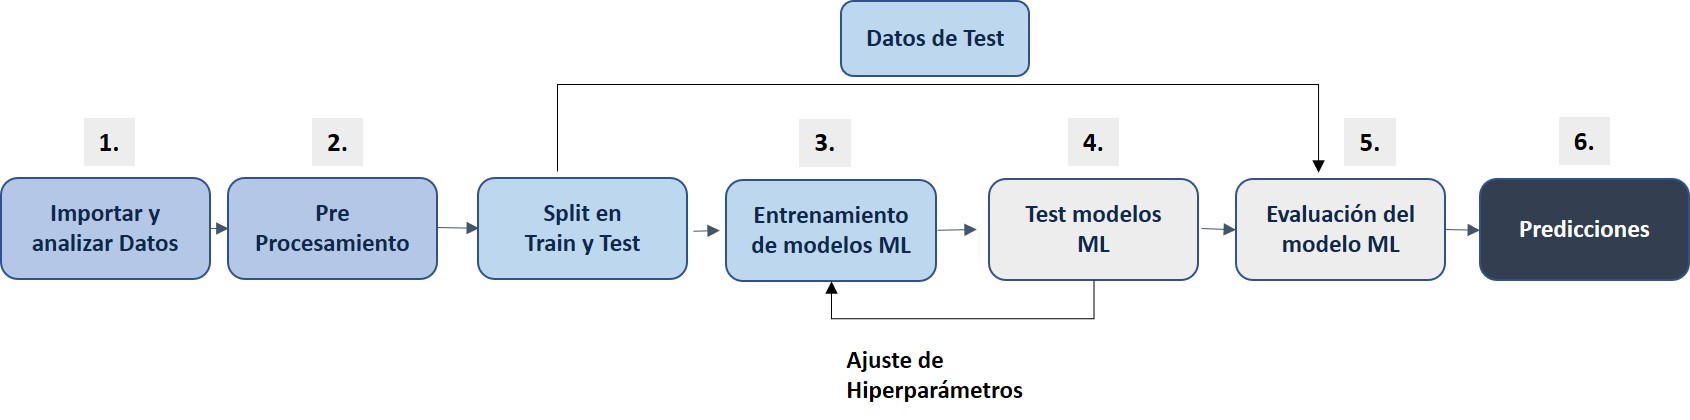

### Tipo de Proyecto

**Objetivo**: Predecir el precio del coche en base a sus caracteristicas. Por tanto, se trata de un proyecto de aprendizaje automatico supervisado de regresión.

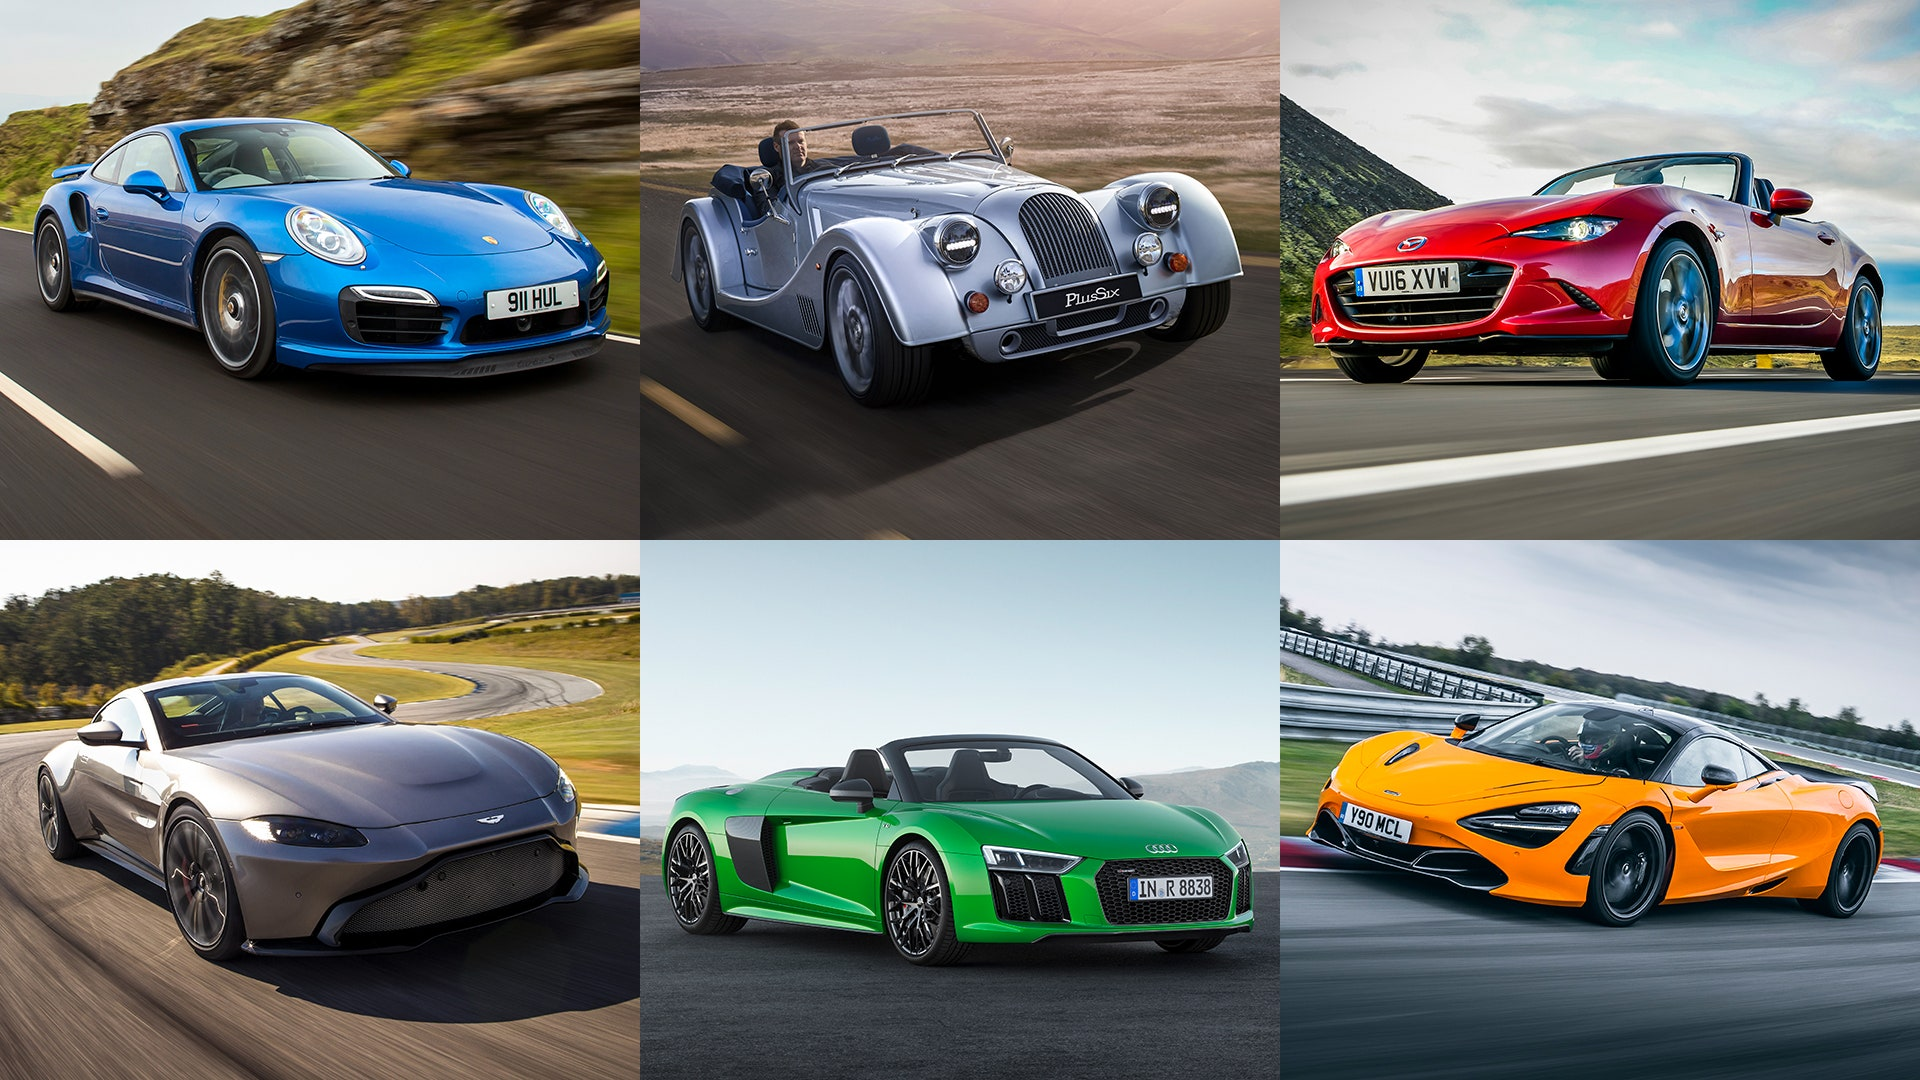

## Importación y limpieza de los datos

In [1]:
import pandas as pd
import numpy as np
#jupyter nbextension install --py luxwidget
#jupyter nbextension enable --py luxwidget

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder

Se definen todas las funciones a utilizar.

In [2]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Se importan los datos.

In [3]:
path = 'Automobile_data.csv'
data = pd.read_csv(path, sep=";",index_col=0)

data_pipeline= data
data_pipeline = data_pipeline.dropna()

In [4]:
data.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


Se divide en la informacion numerica y categorica

In [5]:
numerical = []
categorical = []

for y in data.columns:
    if(data[y].dtype == np.float64 or data[y].dtype == np.int64):
          numerical.append(y)
    else:
          categorical.append(y)

In [6]:
#### FORMA MAS EFICIENTE DE HACERLO
numerical = data.select_dtypes(include=np.number).columns.tolist()
categorical = data.select_dtypes(exclude=np.number).columns.tolist()

In [7]:
numerical

['wheel-base', 'length', 'horsepower', 'average-mileage', 'price']

In [8]:
categorical

['company', 'body-style', 'engine-type', 'num-of-cylinders']

Describe con estadisticos aquellas variables numericas

In [9]:
data.describe()

,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,58.000000
mean,98.481967,173.098361,107.852459,25.803279,15387.000000
std,6.679234,14.021846,53.524398,8.129821,11320.259841
min,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,101.200000,177.300000,123.000000,31.000000,18120.500000
max,120.900000,208.100000,288.000000,47.000000,45400.000000


#### !!!!! Herramientas útiles !!!!!!!!!!

#### 1. Pandas_profiling

In [10]:
from ydata_profiling import ProfileReport

El *ProfileReport* da un overview de toda la informacion y todos los graficos necesarios.

**Alerts:** cosas importantes a tener en cuenta para el EDA

**Correlacion:** chequear correlacion de las variables numericas con los scatter plots.

In [11]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## PRE-PROCESAMIENTO 

### Tratamiento de valores faltantes

1) **Eliminación de columnas con valores perdidos**
La opción más sencilla es eliminar las columnas con valores perdidos.A menos que falten la mayoría de los valores en las columnas eliminadas, el modelo pierde acceso a mucha información (¡potencialmente útil!) 


2) **Imputación**
La imputación completa los valores faltantes con algún número. Por ejemplo, para variables continuas podemos completar con el valor medio y para varaibles categoricas podemos utilizar la moda.

3) **Una extensión a la imputación**
La imputación es el enfoque estándar y, por lo general, funciona bien. Sin embargo, los valores imputados pueden estar sistemáticamente por encima o por debajo de sus valores reales (que no se recopilaron en el conjunto de datos). O las filas con valores perdidos pueden ser únicas de alguna otra manera. En ese caso, su modelo haría mejores predicciones al considerar qué valores faltaban originalmente.

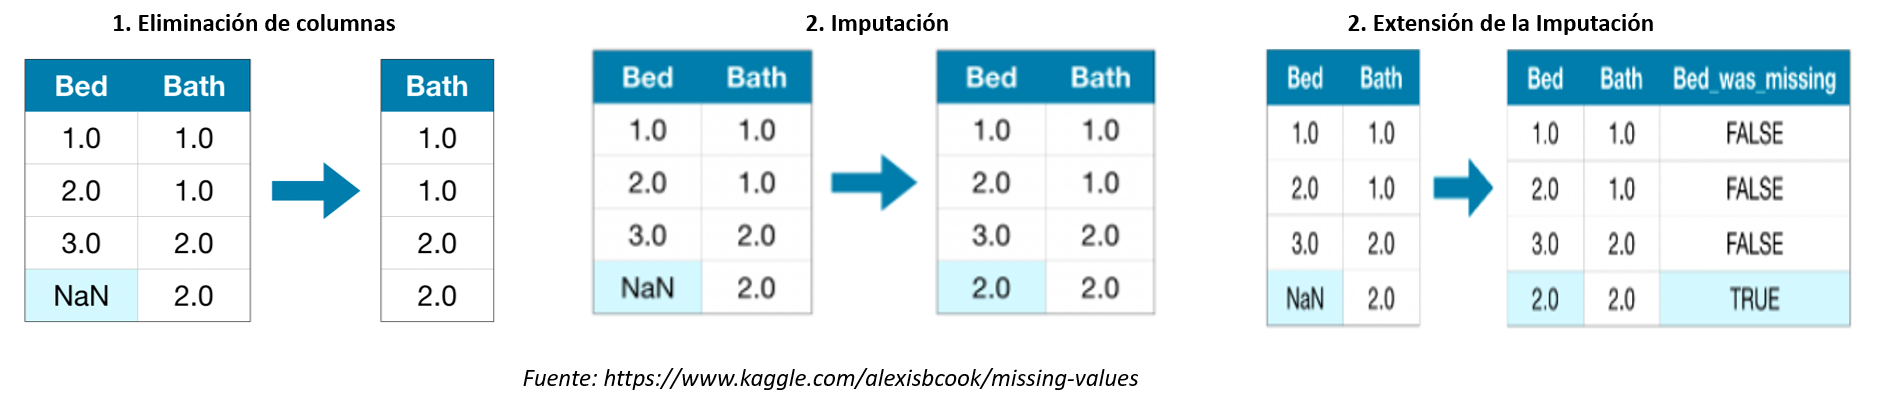

### Visualización de valores faltantes

In [12]:
%matplotlib inline

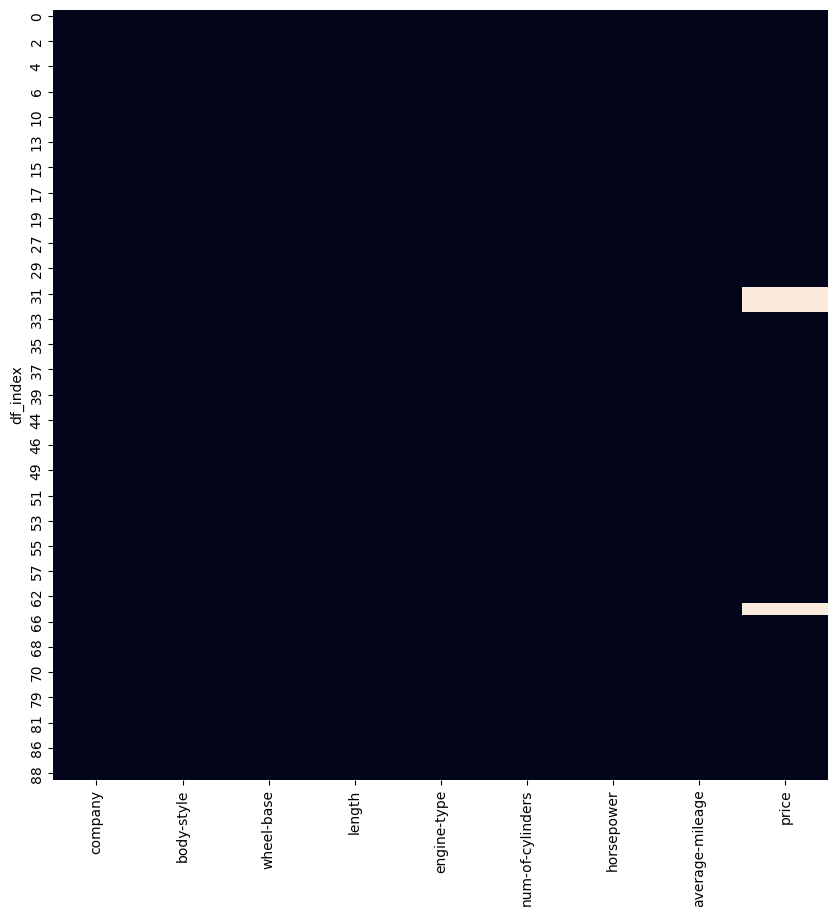

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cbar=False);

##### Eliminacion de valores faltantes

In [14]:
threshold = 0.7

# Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

# Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

# elimnacion de filas con valores faltantes
data = data.dropna()

##### Imputación de valores en variables categoricas

In [15]:
from sklearn.impute import SimpleImputer

# Filling missing values with medians of the columns
data[numerical] = data[numerical].fillna(data.median(numeric_only=True))

# Automatic impitation
my_imputer = SimpleImputer(strategy='mean')
data[numerical] = pd.DataFrame(my_imputer.fit_transform(data[numerical]))


#### Imputación de valores en variables categoricas

In [16]:
# Fill remaining columns - categorical columns - with mode
data[categorical] = data[categorical].apply(lambda x:x.fillna(x.value_counts().index[0]))

# Automatic impitation
my_imputer = SimpleImputer(strategy='most_frequent')
data[categorical] = pd.DataFrame(my_imputer.fit_transform(data[categorical]))

###  Tratamiento de variables categóricas

- **Codificación One-Hot**: La codificación one-hot crea nuevas columnas que indican la presencia (o ausencia) de cada valor posible en los datos originales. Para entender esto, trabajaremos con un ejemplo.La codificación one-hot generalmente no funciona bien si la variable categórica toma una gran cantidad de valores (es decir, generalmente no la usará para variables que toman más de 15 valores diferentes).

- **Label Encoding**: La codificacion de etiquetas asigna a cada valor unico un numero segun orden alfabetico. No sirve para regresiones.

- **Ordinal Encoding**: La codificación ordinal asigna a cada valor único un número entero diferente. Este enfoque asume un orden de las categorías: "Nunca" (0) <"Rara vez" (1) <"Casi todos los días" (2) <"Todos los días" (3).  Para modelos basados en árboles (como árboles de decisión y bosques aleatorios), puede esperar que la codificación de etiquetas funcione bien con variables ordinales.

- **Frequency Encoding**: La codificacion reemplaza cada valor unico por la frecuencia de presencia de esa categoria.

- **Target Encoding**: La codificacion utiliza informacion de la variable target para transformar la variable categorica. Si se trata de clasificacion booleana, reemplaza la categorica por la proporcion de la clase positiva. Si se trata de regresion reemplaza por la media de la categoria. Puede llevar a Data Leakage.


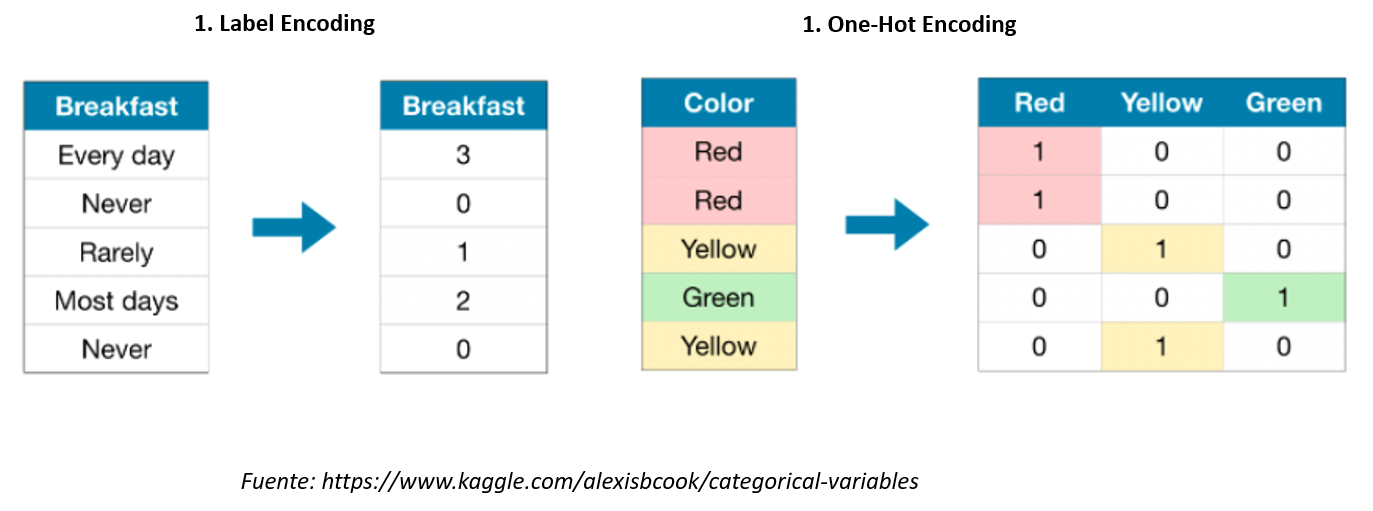

#### One-hot encoding

In [17]:
# Pasamos las variables categoricas a numericas 
data = pd.get_dummies(data, columns=['company', 'body-style', 'engine-type'],drop_first=True)

In [18]:
data.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price,company_audi,company_bmw,company_chevrolet,company_dodge,...,company_volvo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
df_index,,,,,,,,,,,,,,,,,,,,,
0,88.6,168.8,four,111.0,21.0,13495.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,88.6,168.8,four,111.0,21.0,16500.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,94.5,171.2,six,154.0,19.0,16500.0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,99.8,176.6,four,102.0,24.0,13950.0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,99.4,176.6,five,115.0,18.0,17450.0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


#### Label Encoding

In [19]:
data = data.dropna()
# Aplicamos Label encoder a num-of-cylinders
label_encoder = LabelEncoder()
data['num-of-cylinders_t'] = label_encoder.fit_transform(data['num-of-cylinders'])
data=data.drop(columns=['num-of-cylinders_t'])

In [20]:
set(data['num-of-cylinders'].values)

{'eight', 'five', 'four', 'six', 'three', 'two'}

In [21]:
cleanup_nums = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':7}
data['num-of-cylinders']=data['num-of-cylinders'].replace(cleanup_nums)


In [22]:
set(data['num-of-cylinders'])

{2, 3, 4, 5, 6, 7}

### Transformaciones numéricas

Escala de características (normalización)
La escala de características es un método utilizado para normalizar el rango de variables independientes o características de los datos.  El escalado de características impacta más en los modelos no basados en árboles que en los modelos basados en árboles. 
Existen diferentes métodos para normalizar características, como:
1. **Min-Max Normalization**: este es el tipo más simple de normalización en el que las características se vuelven a escalar al rango [0, 1].

2. **Estandarización**: en este tipo de normalización, una característica se escala de tal manera que su media es cero y la varianza es uno.

#### a) Min-Max Normalization

In [23]:
data[["wheel_base", "horsepower"]] = MinMaxScaler().fit_transform(data[["wheel-base", "horsepower"]])

#### b) Estandarización

In [24]:
from sklearn.preprocessing import StandardScaler

data[["wheel_base", "horsepower"]] = StandardScaler().fit_transform(data[["wheel-base", "horsepower"]])

#### Eliminación de outliers

En estadística, un valor atípico es un punto de observación que está distante de otras observaciones. 
Para la eliminación de otuliers hay multiples técnicas:

- La puntuación Z es el número de desviaciones estándar por las cuales el valor de una observación o un punto de datos está por encima del valor medio de lo que se está observando o midiendo.
- Método del rango interqueartilico
- Metodos avanzados: Isolation forest, LOF: Identifying Density-based Local Outliers

In [25]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[["wheel_base", "horsepower"]]))
data.shape

(43, 29)

In [26]:
data[["wheel_base", "horsepower"]] = data[["wheel_base", "horsepower"]][(z < 3).all(axis=1)]
data.shape

(43, 29)

#### Transformación logarítmica
La transformación logarítmica es otra técnica de uso común cuando desea reducir la variabilidad de los datos. Otro uso popular de la transformación logarítmica es cuando la distribución de datos está muy sesgada.

In [27]:
# transformaciones numéricas
data['log_wheel_base'] = np.log(data['wheel-base'] + 1)


/Users/anoguera/Documents/GitHub/MLAvanzado-Coursera/.conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anoguera/Documents/GitHub/MLAvanzado-Coursera/.conda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


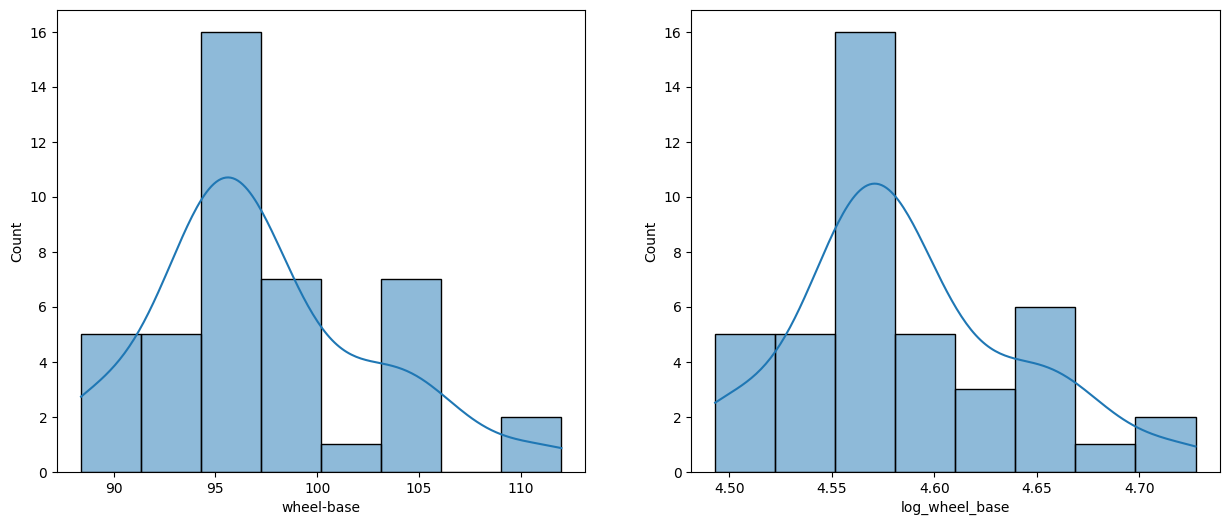

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(data['wheel-base'], ax=ax1, kde=True)
sns.histplot(data['log_wheel_base'], ax=ax2, kde=True);

## Pipelines

Los Pipelines son una forma sencilla de mantener organizado el código de modelado y preprocesamiento de datos. Específicamente, un pipeline agrupa los pasos de preprocesamiento y modelado para que pueda usar todo el paquete como si fuera un solo paso.

Algunos de sus beneficios importantes:

- **Código más limpio**: tener en cuenta los datos en cada paso del preprocesamiento puede resultar complicado. Con una canalización, no necesitas realizar un seguimiento manual de sus datos en cada paso.

- **Menos errores**: hay menos oportunidades de aplicar mal un paso u olvidar un paso de procesamiento previo.

- **Más fácil de producir**: puede ser sorprendentemente difícil hacer la transición de un modelo de un prototipo a algo que se pueda implementar a escala.

- **Más opciones para la validación del modelo**: permiten aplicar de forma sencilla la validación cruzada

### Split de los datos en train y test

In [29]:
numerical= numerical.remove('price')

##### Division de datos

In [30]:
## Split de los datos en train y test
from sklearn.model_selection import train_test_split

X = data_pipeline.drop(columns= ['price'])
y = data_pipeline['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)


##### Diferenciacion de variables categoricas y numericas

In [31]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
categorical = list(s[s].index)

# Get list of categorical variables
s = (X_train.dtypes != 'object')
numerical = list(s[s].index)

##### Configuración del Pipeline

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
     ('imputer',SimpleImputer(strategy='mean')),
     ('Scaler',MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

##### Aplicacion del Pipeline

In [34]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])



# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_train)

# Evaluate the model
score = mean_absolute_error(y_train, preds)
print('MAE:', score)

MAE: 736.7378017718714


## Validación cruzada 

¿Qué es la validación cruzada?
En la validación cruzada, ejecutamos nuestro proceso de modelado en diferentes subconjuntos de datos para obtener múltiples medidas de la calidad del modelo.

Por ejemplo, podríamos comenzar dividiendo los datos en 5 partes, cada una del 20% del conjunto de datos completo. En este caso, decimos que hemos dividido los datos en 5 "pliegues".

- En el Experimento 1, usamos el primer pliegue como un conjunto de validación (o reserva) y todo lo demás como datos de entrenamiento. Esto nos da una medida de la calidad del modelo basada en un conjunto de retención del 20%.
- En el Experimento 2, guardamos los datos del segundo pliegue. El conjunto de reserva se utiliza luego para obtener una segunda estimación de la calidad del modelo.
- Repetimos este proceso, usando cada pliegue una vez como conjunto de reserva. Al juntar esto, el 100% de los datos se usa como reserva en algún momento, y terminamos con una medida de la calidad del modelo que se basa en todas las filas del conjunto de datos .

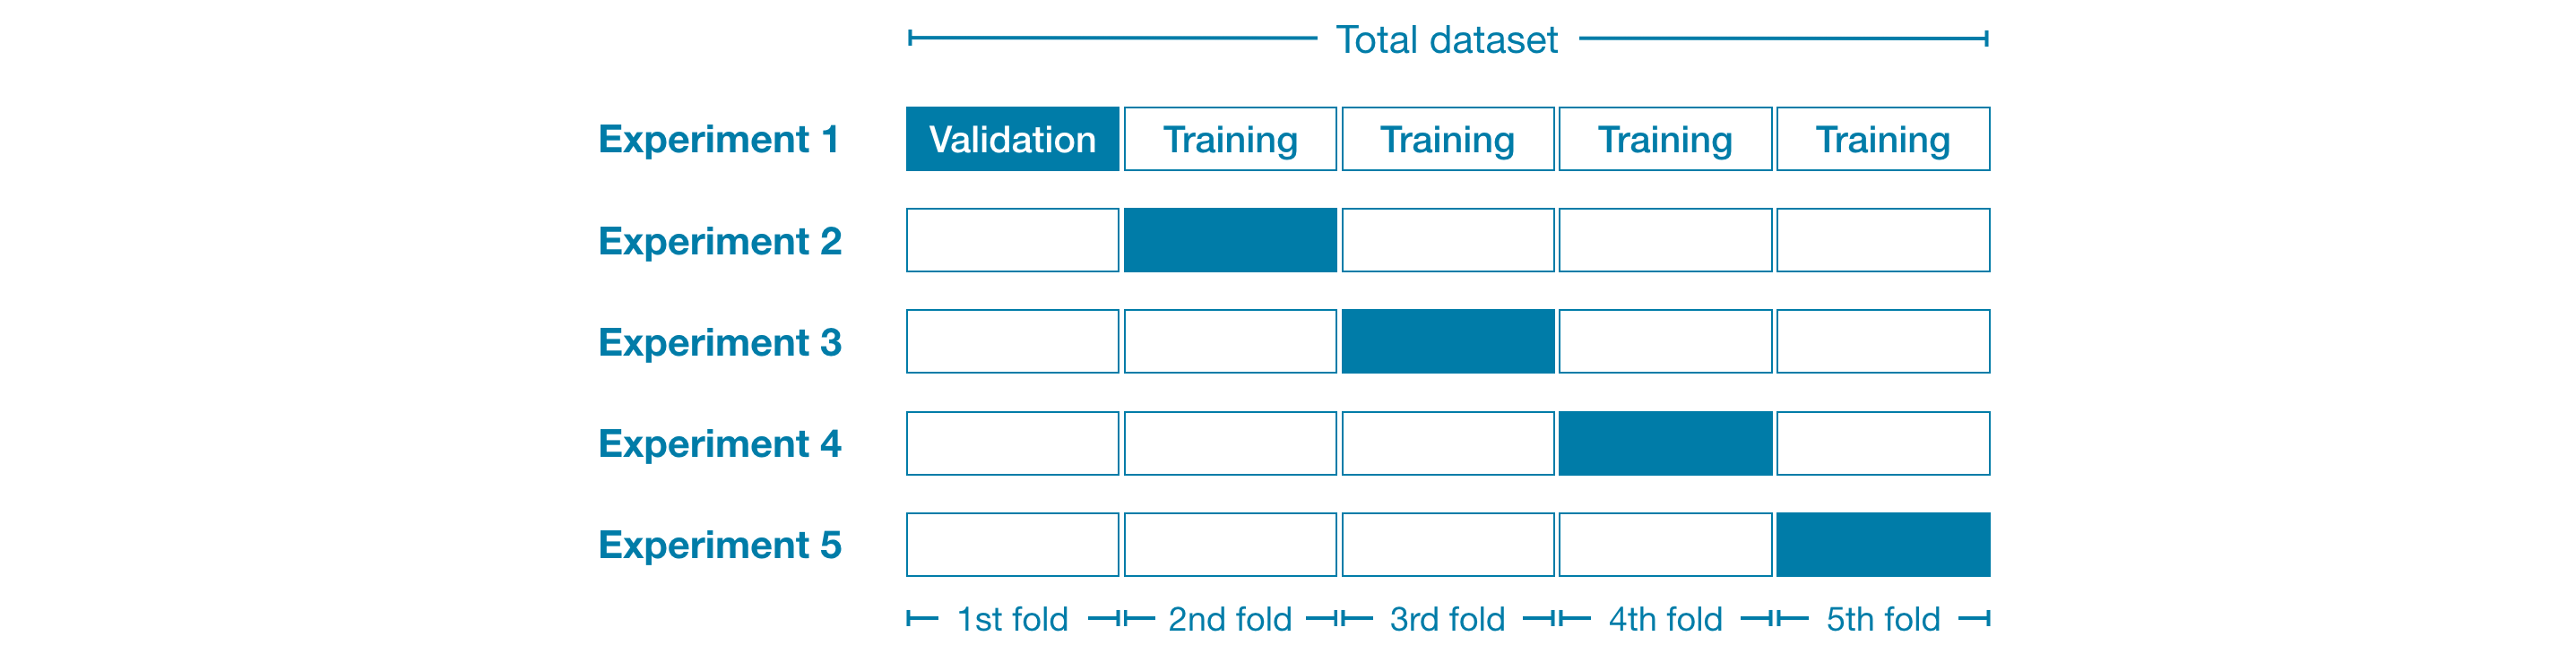

*Fuente*: https://www.kaggle.com/alexisbcook/cross-validation

¿Cuándo debería utilizar la validación cruzada?
La validación cruzada proporciona una medida más precisa de la calidad del modelo, lo cual es especialmente importante si está tomando muchas decisiones de modelado. Sin embargo, puede tardar más en ejecutarse porque estima varios modelos (uno para cada pliegue).

Entonces, dadas estas compensaciones, ¿cuándo debería usar cada enfoque?

- Para conjuntos de datos pequeños, donde la carga computacional adicional no es un gran problema, se debe ejecutar una validación cruzada.
- Para conjuntos de datos más grandes, un solo conjunto de validación es suficiente. 


In [35]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline,X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [1870.90018519  635.67111111 2952.2962963  4934.39370536 1643.41690476]


In [36]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
2407.3356405423283


## XGBoost y Ajuste de hiperparámetros

Durante gran parte de este curso, se ha realizado predicciones con el random Forest, que logra un mejor rendimiento que un solo árbol de decisión simplemente promediando las predicciones de muchos árboles de decisión.

Nos referimos al método del random forest como un "método de conjunto" (**ensemble**). Por definición, los métodos de conjunto combinan las predicciones de varios modelos (por ejemplo, varios árboles, en el caso de bosques aleatorios).

A continuación, aprenderemos sobre otro método de conjunto llamado aumento de gradiente.

**Aumento de gradiente (Gradient Boosting)**:


El **Gradient Boosting** es un método que pasa por ciclos para agregar modelos de manera iterativa a un conjunto. Comienza inicializando el conjunto con un solo modelo, cuyas predicciones pueden ser bastante ingenuas. (Incluso si sus predicciones son tremendamente inexactas, las adiciones posteriores al conjunto abordarán esos errores).

Luego, comenzamos el ciclo:

- Primero, usamos el conjunto actual para generar predicciones para cada observación en el conjunto de datos. Para hacer una predicción, agregamos las predicciones de todos los modelos en el conjunto.
- Estas predicciones se utilizan para calcular una función de pérdida (como el error cuadrático medio, por ejemplo).
- Luego, usamos la función de pérdida para ajustar un nuevo modelo que se agregará al conjunto. Específicamente, determinamos los parámetros del modelo para que agregar este nuevo modelo al conjunto reduzca la pérdida. 
- Finalmente, agregamos el nuevo modelo al conjunto, y ...
- ... Repetimos

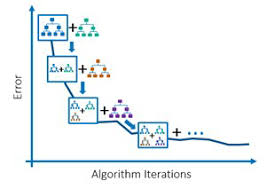

En este ejemplo, se trabajará con la biblioteca **XGBoost**. XGBoost significa aumento de gradiente extremo, que es una implementación de **Gradient boosting con varias características adicionales** centradas en la optimización del rendimiento y de la velocidad.

In [37]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)
                             ])

X = my_pipeline.fit_transform(data_pipeline)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)

In [39]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [40]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

En general, una tasa de aprendizaje pequeña y una gran cantidad de estimadores producirán modelos XGBoost más precisos, aunque también llevará más tiempo entrenar el modelo, ya que realiza más iteraciones a lo largo del ciclo. De forma predeterminada, XGBoost establece learning_rate = 0.1

In [46]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
              'learning_rate': [0.02,0.03,0.04], 
              'max_depth': [1,2],
              'min_child_weight': [2,3,4],
              'subsample': [0.8],
              'colsample_bytree': [0.2,0.3,0.4],
              'n_estimators': [50,60,70,100]}

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

In [48]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=60, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=70, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.2, learning_rate=0.02, max_depth=1, min_child_weight=2, n_estimators=60, subsample=0.8; total time=

{'colsample_bytree': 0.3,
 'learning_rate': 0.04,
 'max_depth': 2,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [49]:
from sklearn.metrics import mean_absolute_error

predictions = grid_search.predict(X_train)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_train)))

Mean Absolute Error: 1238.0404365007269
